In [8]:
import numpy as np
import pandas as pd
import pathlib
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image

In [4]:
data_dir = pathlib.Path('/kaggle/input/skin-disease-classification-dataset/Skin Disease Classification Dataset/New folder')
data_dir

PosixPath('/kaggle/input/skin-disease-classification-dataset/Skin Disease Classification Dataset/New folder')

In [33]:
# Load image file paths from each class folder
acne = list(data_dir.glob('acne/*/*.jpg')) 
vitiligo = list(data_dir.glob('Vitiligo/*/*.jpg'))
hyperpigmentation = list(data_dir.glob('hyperpigmentation/*/*.jpeg'))
nail_psoriasis = list(data_dir.glob('Nail_psoriasis/*/*.jpeg'))
sjs_ten = list(data_dir.glob('SJS-TEN/*/*.jpeg'))

In [34]:
acne[0]

PosixPath('/kaggle/input/skin-disease-classification-dataset/Skin Disease Classification Dataset/New folder/acne/acne/Crop-0350_100400177__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg')

In [36]:
# Function to read and preprocess the image
def preprocess_image(image_path):
    image = cv2.imread(str(image_path))
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    r, g, b = cv2.split(image_rgb)
    
    r_eq = cv2.equalizeHist(r)
    g_eq = cv2.equalizeHist(g)
    b_eq = cv2.equalizeHist(b)

    enhanced_image = cv2.merge([r_eq, g_eq, b_eq])
    gray_image = cv2.cvtColor(enhanced_image, cv2.COLOR_RGB2GRAY)

    return enhanced_image, gray_image


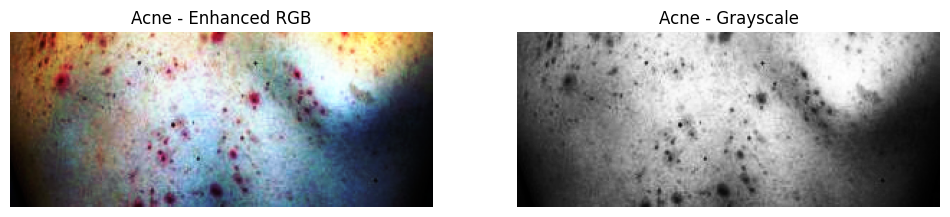

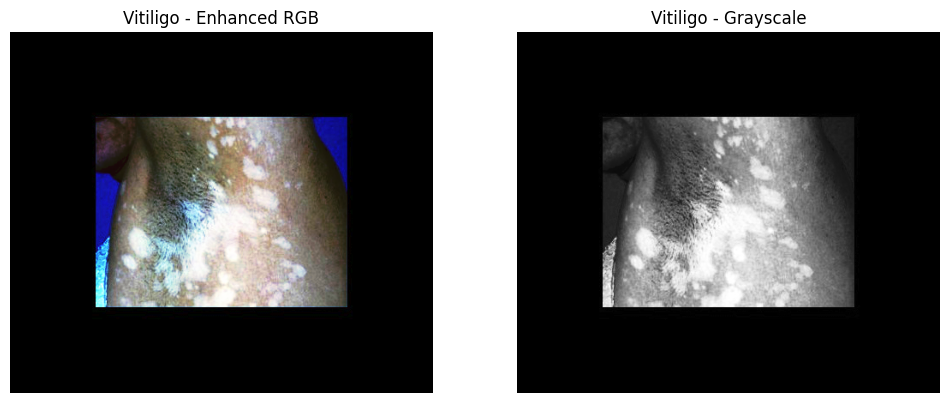

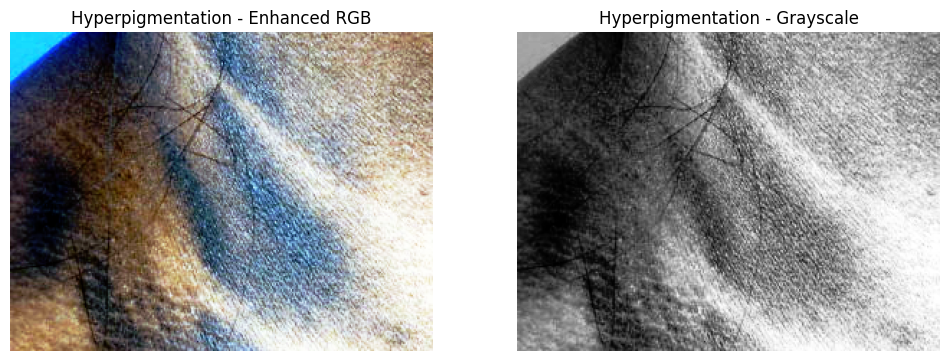

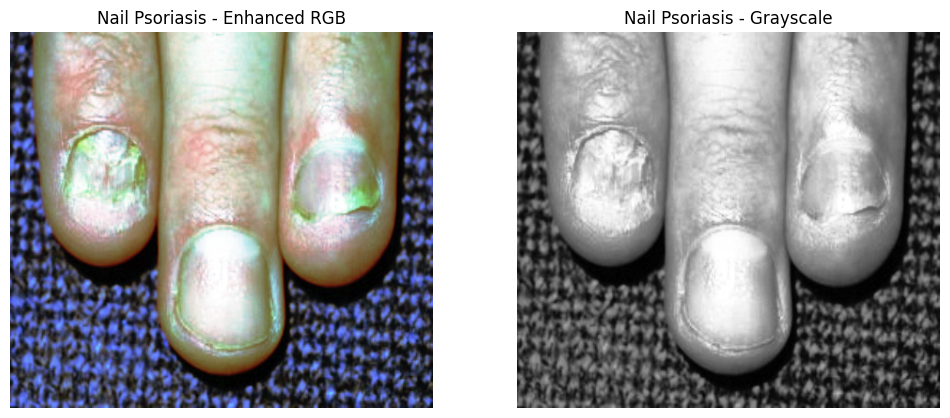

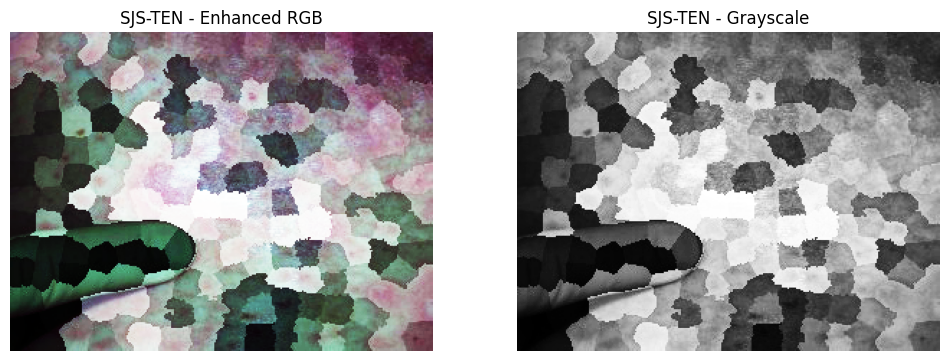

In [37]:
# Process and display the first image from each class
def display_images():
    class_folders = {
        'Acne': acne,
        'Vitiligo': vitiligo,
        'Hyperpigmentation': hyperpigmentation,
        'Nail Psoriasis': nail_psoriasis,
        'SJS-TEN': sjs_ten
    }

    for class_name, image_paths in class_folders.items():
        if image_paths:
            image_path = image_paths[0]
            enhanced_image, gray_image = preprocess_image(image_path)

            # Display the results for each class
            fig, axes = plt.subplots(1, 2, figsize=(12, 6))
            axes[0].imshow(enhanced_image)
            axes[0].set_title(f"{class_name} - Enhanced RGB")
            axes[0].axis('off')

            axes[1].imshow(gray_image, cmap='gray')
            axes[1].set_title(f"{class_name} - Grayscale")
            axes[1].axis('off')

            plt.show()

display_images()

In [38]:
# Function for Global Thresholding (Otsu’s method)
def global_thresholding(gray_image):
    _, thresholded_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresholded_image


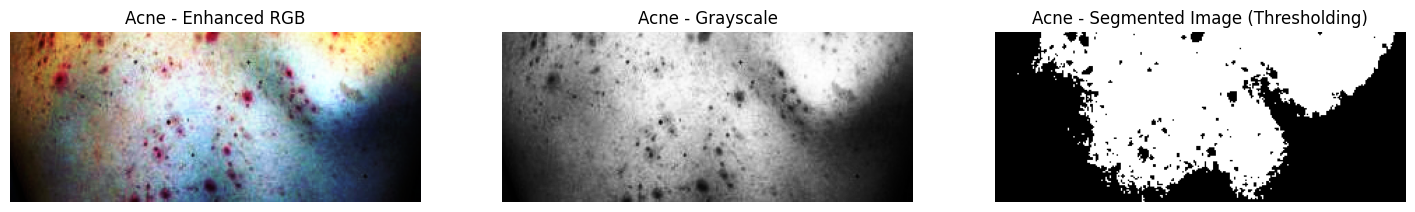

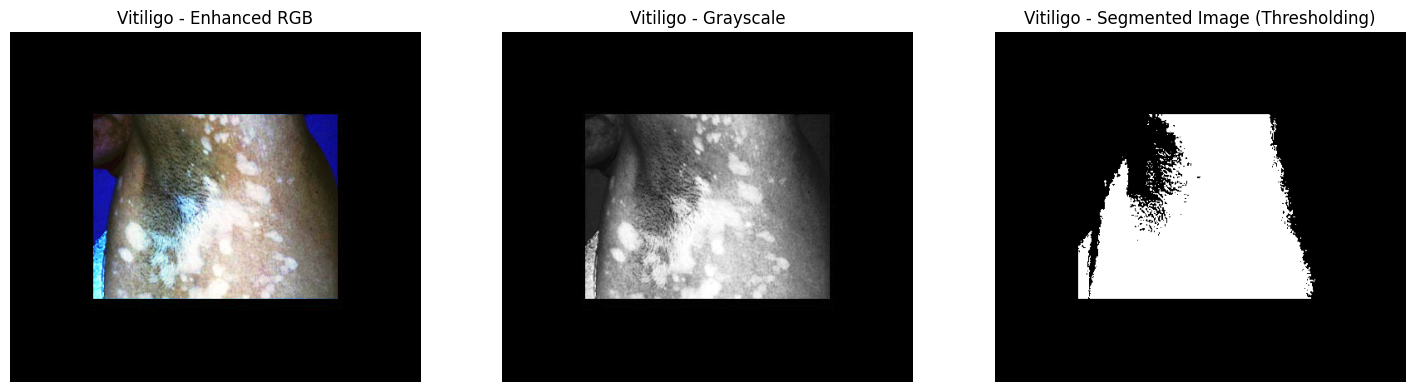

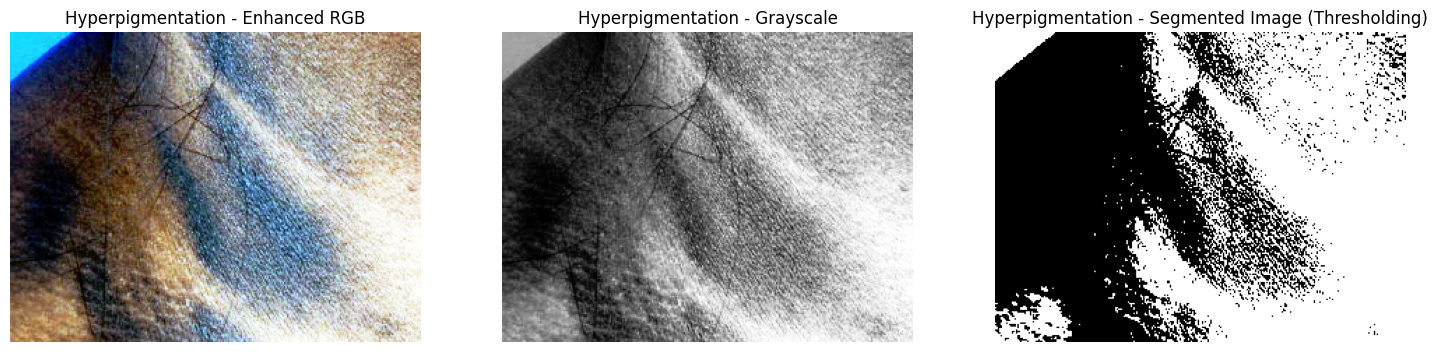

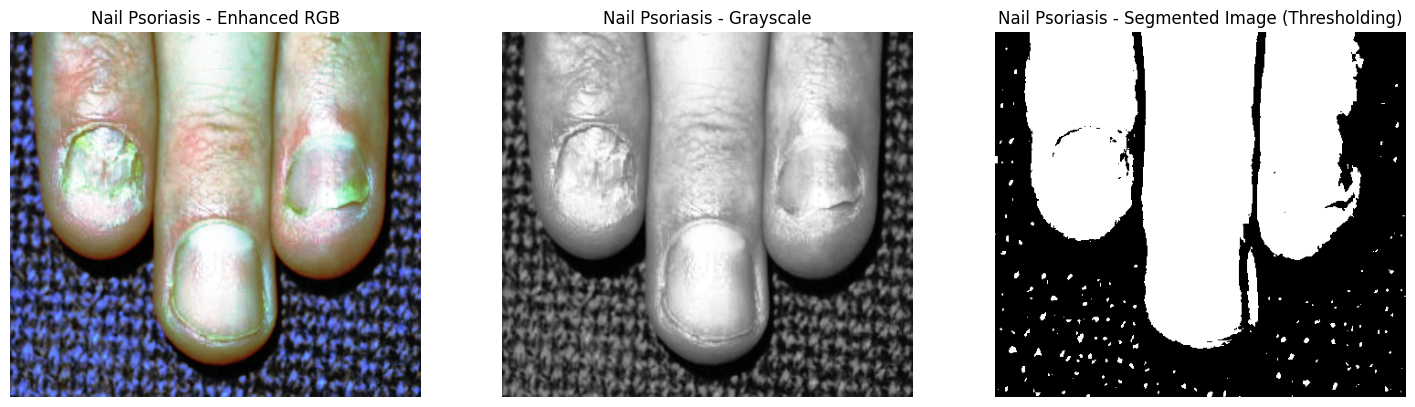

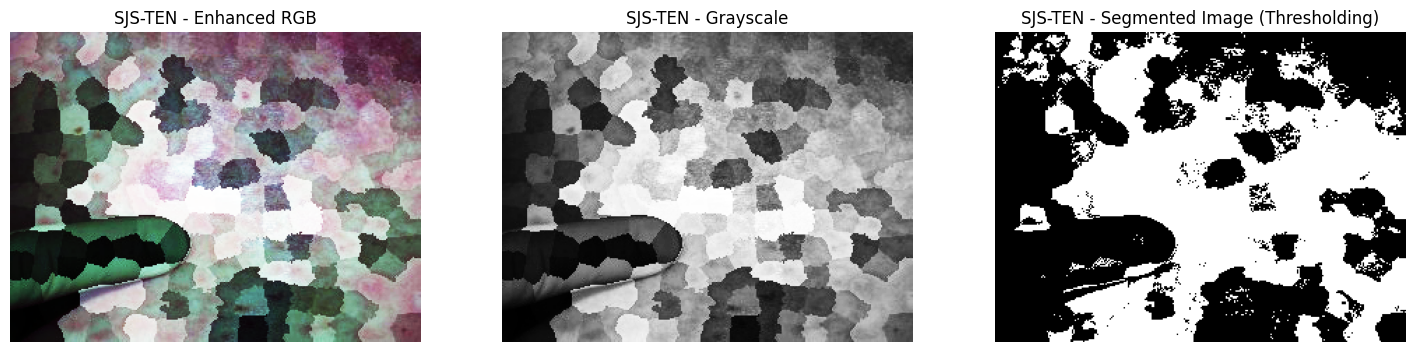

In [39]:
# Process and display the first image from each class
def display_images():
    class_folders = {
        'Acne': acne,
        'Vitiligo': vitiligo,
        'Hyperpigmentation': hyperpigmentation,
        'Nail Psoriasis': nail_psoriasis,
        'SJS-TEN': sjs_ten
    }

    for class_name, image_paths in class_folders.items():
        if image_paths:
            # Load and preprocess the first image
            image_path = image_paths[0]
            enhanced_image, gray_image = preprocess_image(image_path)

            # Apply Global Thresholding (Otsu's method)
            thresholded_image = global_thresholding(gray_image)

            # Display the results for each class
            fig, axes = plt.subplots(1, 3, figsize=(18, 6))
            
            # Display Enhanced Image
            axes[0].imshow(enhanced_image)
            axes[0].set_title(f"{class_name} - Enhanced RGB")
            axes[0].axis('off')

            # Display Grayscale Image
            axes[1].imshow(gray_image, cmap='gray')
            axes[1].set_title(f"{class_name} - Grayscale")
            axes[1].axis('off')

            # Display Thresholded Image (Segmented)
            axes[2].imshow(thresholded_image, cmap='gray')
            axes[2].set_title(f"{class_name} - Segmented Image (Thresholding)")
            axes[2].axis('off')

            plt.show()

display_images()


In [43]:
from skimage.feature import graycomatrix, graycoprops
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio

In [44]:
# GLCM Feature Extraction
def extract_glcm_features(gray_image):
    glcm = graycomatrix(gray_image, distances=[1], angles=[0], symmetric=True, normed=True)
    
    energy = graycoprops(glcm, prop='energy')[0, 0]
    entropy = graycoprops(glcm, prop='entropy')[0, 0]
    contrast = graycoprops(glcm, prop='contrast')[0, 0]
    idm = graycoprops(glcm, prop='homogeneity')[0, 0]  # Inverse Difference Moment
    correlation = graycoprops(glcm, prop='correlation')[0, 0]
    asm = graycoprops(glcm, prop='ASM')[0, 0]  # Angular Second Moment
    
    return energy, entropy, contrast, idm, correlation, asm

# Image Quality Assessment: MSE and PSNR
def image_quality_assessment(original, segmented):
    mse_value = mean_squared_error(original, segmented)
    psnr_value = peak_signal_noise_ratio(original, segmented)
    return mse_value, psnr_value

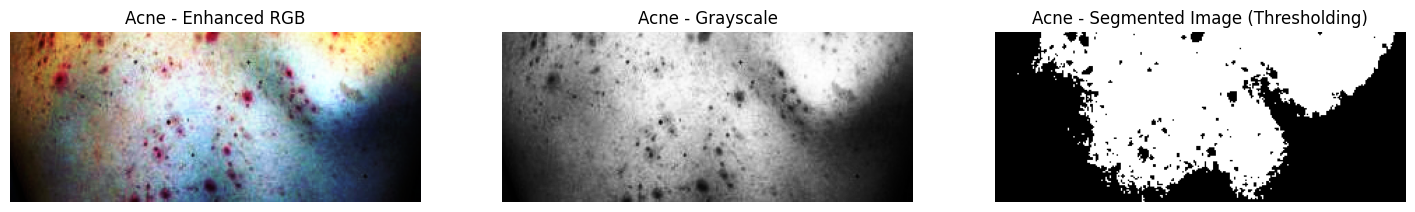

Acne - GLCM Features:
Energy: 0.0173, Entropy: 8.6718, Contrast: 148.8565, IDM: 0.2272, Correlation: 0.9856, ASM: 0.0003
Acne - Image Quality Metrics:
MSE: 5576.0819, PSNR: 10.6675



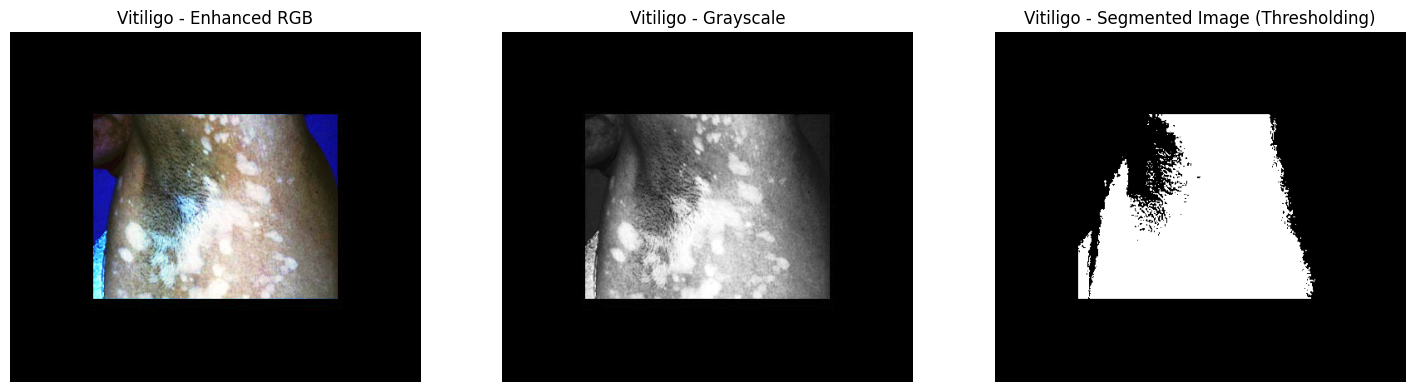

Vitiligo - GLCM Features:
Energy: 0.6561, Entropy: 3.5589, Contrast: 59.0526, IDM: 0.7404, Correlation: 0.9945, ASM: 0.4305
Vitiligo - Image Quality Metrics:
MSE: 2179.0007, PSNR: 14.7482



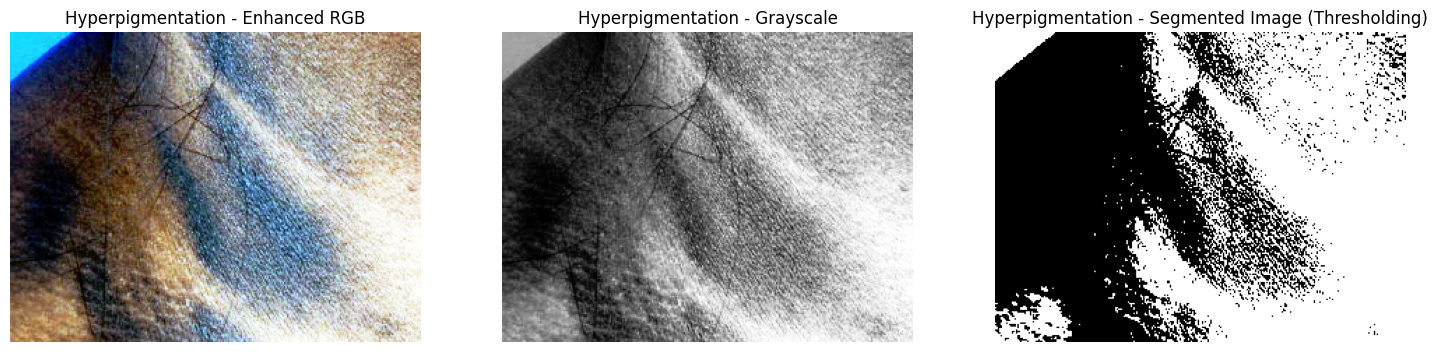

Hyperpigmentation - GLCM Features:
Energy: 0.0101, Entropy: 9.6988, Contrast: 787.2917, IDM: 0.0917, Correlation: 0.9235, ASM: 0.0001
Hyperpigmentation - Image Quality Metrics:
MSE: 5614.9687, PSNR: 10.6373



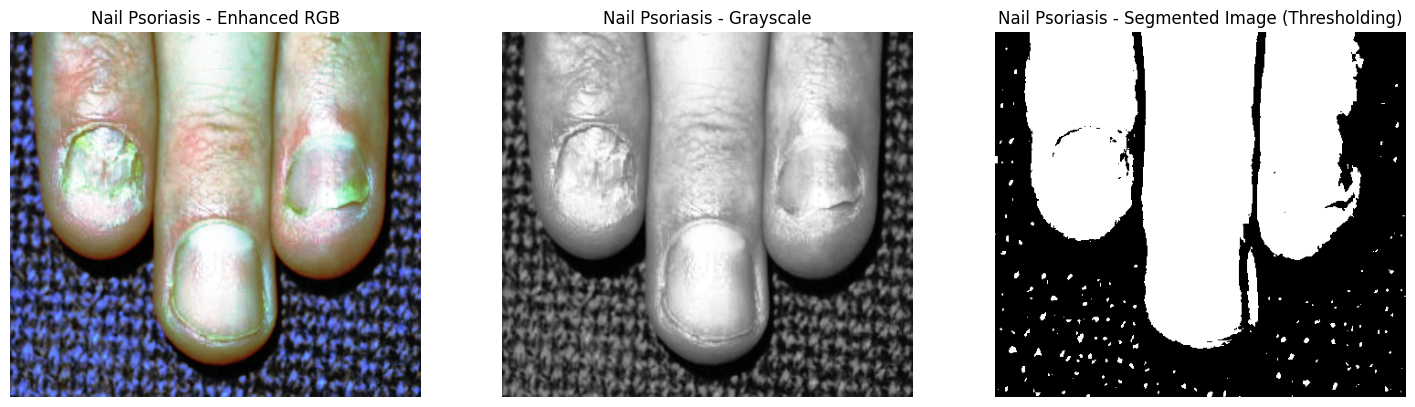

Nail Psoriasis - GLCM Features:
Energy: 0.0162, Entropy: 8.8117, Contrast: 87.5108, IDM: 0.2244, Correlation: 0.9917, ASM: 0.0003
Nail Psoriasis - Image Quality Metrics:
MSE: 5586.5845, PSNR: 10.6593



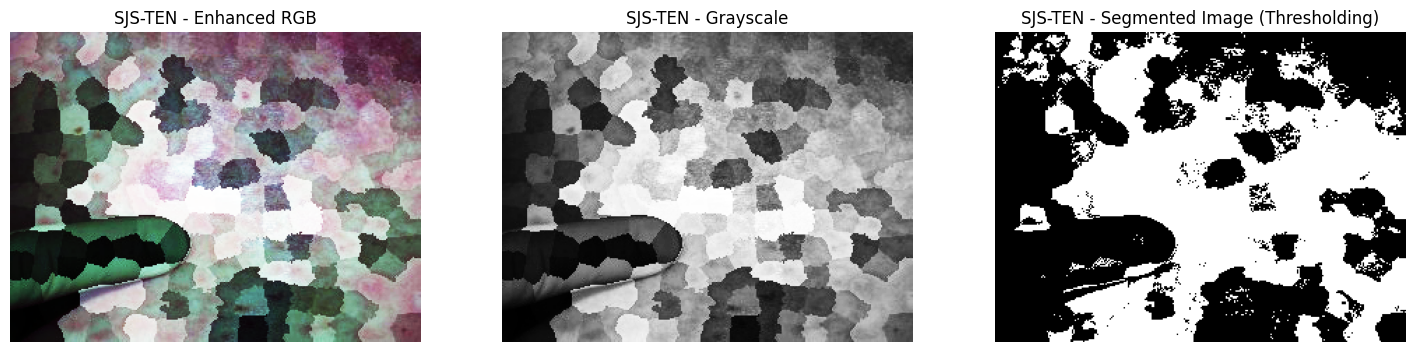

SJS-TEN - GLCM Features:
Energy: 0.0193, Entropy: 8.6786, Contrast: 498.9424, IDM: 0.2648, Correlation: 0.9527, ASM: 0.0004
SJS-TEN - Image Quality Metrics:
MSE: 5554.7944, PSNR: 10.6841



In [45]:
# Process and display the first image from each class
def display_images():
    class_folders = {
        'Acne': acne,
        'Vitiligo': vitiligo,
        'Hyperpigmentation': hyperpigmentation,
        'Nail Psoriasis': nail_psoriasis,
        'SJS-TEN': sjs_ten
    }

    for class_name, image_paths in class_folders.items():
        if image_paths:
            image_path = image_paths[0]
            enhanced_image, gray_image = preprocess_image(image_path)
            thresholded_image = global_thresholding(gray_image)

            energy, entropy, contrast, idm, correlation, asm = extract_glcm_features(gray_image)

            mse_value, psnr_value = image_quality_assessment(gray_image, thresholded_image)

            fig, axes = plt.subplots(1, 3, figsize=(18, 6))
            
            # Display Enhanced Image
            axes[0].imshow(enhanced_image)
            axes[0].set_title(f"{class_name} - Enhanced RGB")
            axes[0].axis('off')

            # Display Grayscale Image
            axes[1].imshow(gray_image, cmap='gray')
            axes[1].set_title(f"{class_name} - Grayscale")
            axes[1].axis('off')

            # Display Thresholded Image (Segmented)
            axes[2].imshow(thresholded_image, cmap='gray')
            axes[2].set_title(f"{class_name} - Segmented Image (Thresholding)")
            axes[2].axis('off')

            plt.show()

            # Print GLCM features
            print(f"{class_name} - GLCM Features:")
            print(f"Energy: {energy:.4f}, Entropy: {entropy:.4f}, Contrast: {contrast:.4f}, "
                  f"IDM: {idm:.4f}, Correlation: {correlation:.4f}, ASM: {asm:.4f}")

            # Print Image Quality Metrics
            print(f"{class_name} - Image Quality Metrics:")
            print(f"MSE: {mse_value:.4f}, PSNR: {psnr_value:.4f}\n")

display_images()

**Training the Model**

In [50]:
classes = {
    "Acne": acne,
    "Vitiligo": vitiligo,
    "Hyperpigmentation": hyperpigmentation,
    "Nail Psoriasis": nail_psoriasis,
    "SJS-TEN": sjs_ten
}

In [51]:
features = []
labels = []

# Feature extraction loop
for label, image_paths in classes.items():
    for path in image_paths:
        try:
            _, gray = preprocess_image(path)
            gray_resized = cv2.resize(gray, (256, 256))  # Resize for uniform input
            feats = extract_glcm_features(gray_resized)
            features.append(feats)
            labels.append(label)
        except Exception as e:
            print(f"Error processing {path.name}: {e}")

df = pd.DataFrame(features, columns=["energy", "entropy", "contrast", "idm", "correlation", "asm"])
df["label"] = labels

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

X = df.drop("label", axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [53]:
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [54]:
y_pred = clf.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [56]:
print(f" Accuracy: {accuracy:.4f}")
print("\n Classification Report:\n")
print(report)

 Accuracy: 0.4906

 Classification Report:

                   precision    recall  f1-score   support

             Acne       0.44      0.43      0.43       230
Hyperpigmentation       0.41      0.36      0.38       140
   Nail Psoriasis       0.54      0.56      0.55       504
          SJS-TEN       0.52      0.53      0.52       633
         Vitiligo       0.44      0.43      0.43       403

         accuracy                           0.49      1910
        macro avg       0.47      0.46      0.46      1910
     weighted avg       0.49      0.49      0.49      1910

